In [ ]:
import pandas as pd
import numpy as np
import cv2

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from subprocess import check_call
from google.colab.patches import cv2_imshow

In [ ]:
df = pd.read_excel('datasetbantuan.xlsx')
df = df.loc[1:,:]
df.head(1)

,NO,NAMA,Luas lantai,Lantai,Dinding,Tdk mem.,Tdk ada,Air Minum,Kayu bakar/,daging 1x,...,Tdk mem..1,Lansia,Disabilitas,Usia Dini,Ibu Hamil,Anak SD,Anak SMP,Anak SMA,Unnamed: 23,Kategori
1,0.0,INITIAL,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TIDAK


In [ ]:
col = ['no','nama','luas_lantai','lantai_tanah',
       'dinding_bambu','tidak_punya_mck','tidak_punya_listrik',
       'air_minum_sumur','kayu_bakar','daging_satu_seminggu',
       'satu_baju_setahun','makan_satu_dua_sehari','tidak_sanggup_berobat',
       'penghasilan_dibawah_600','kk_tidak_sekolah','tidak_punya_tabungan',
       'lansia','disabilitas','usia_dini','ibu_hamil','anak_sd',
       'anak_smp','anak_sma','not_set','label']

In [ ]:
arr = df.to_numpy()
df = pd.DataFrame(arr, columns=col)
df.head(1)

,no,nama,luas_lantai,lantai_tanah,dinding_bambu,tidak_punya_mck,tidak_punya_listrik,air_minum_sumur,kayu_bakar,daging_satu_seminggu,...,tidak_punya_tabungan,lansia,disabilitas,usia_dini,ibu_hamil,anak_sd,anak_smp,anak_sma,not_set,label
0,0.0,INITIAL,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TIDAK


In [ ]:
df.to_excel('dataready.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       376 non-null    object
 1   nama                     376 non-null    object
 2   luas_lantai              376 non-null    object
 3   lantai_tanah             376 non-null    object
 4   dinding_bambu            376 non-null    object
 5   tidak_punya_mck          376 non-null    object
 6   tidak_punya_listrik      376 non-null    object
 7   air_minum_sumur          376 non-null    object
 8   kayu_bakar               376 non-null    object
 9   daging_satu_seminggu     376 non-null    object
 10  satu_baju_setahun        376 non-null    object
 11  makan_satu_dua_sehari    376 non-null    object
 12  tidak_sanggup_berobat    376 non-null    object
 13  penghasilan_dibawah_600  376 non-null    object
 14  kk_tidak_sekolah         376 non-null    o

In [ ]:
df.isnull().sum()

no                           0
nama                         0
luas_lantai                  0
lantai_tanah                 0
dinding_bambu                0
tidak_punya_mck              0
tidak_punya_listrik          0
air_minum_sumur              0
kayu_bakar                   0
daging_satu_seminggu         0
satu_baju_setahun            0
makan_satu_dua_sehari        0
tidak_sanggup_berobat        0
penghasilan_dibawah_600      0
kk_tidak_sekolah             0
tidak_punya_tabungan         0
lansia                       0
disabilitas                  0
usia_dini                    0
ibu_hamil                    0
anak_sd                      0
anak_smp                     0
anak_sma                     1
not_set                    148
label                        0
dtype: int64

In [ ]:
df['anak_sma'].replace('', np.nan, inplace=True)
df.dropna(subset=['anak_sma'], inplace=True)

In [ ]:
cek = df["label"].value_counts()
cek

BLT      146
TIDAK    142
PKH       87
Name: label, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label_enc']= label_encoder.fit_transform(df['label'])
df.head(1)

,no,nama,luas_lantai,lantai_tanah,dinding_bambu,tidak_punya_mck,tidak_punya_listrik,air_minum_sumur,kayu_bakar,daging_satu_seminggu,...,lansia,disabilitas,usia_dini,ibu_hamil,anak_sd,anak_smp,anak_sma,not_set,label,label_enc
0,0.0,INITIAL,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TIDAK,2


In [ ]:
print(df['label'].unique())
print(df['label_enc'].unique())

['TIDAK' 'BLT' 'PKH']
[2 0 1]


In [ ]:
X = df.loc[:,'luas_lantai':'anak_sma']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)

In [ ]:
len(y_test)

188

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9840425531914894


In [ ]:
#Confusion Matrix
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Pastel1",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

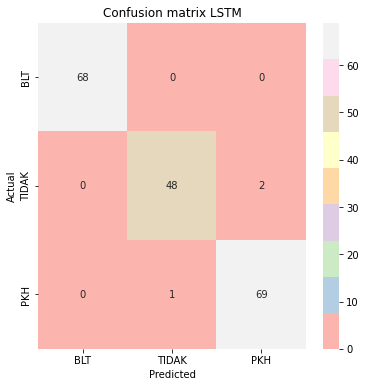

In [ ]:
print_conf(y_test, y_pred, ['BLT', 'TIDAK', 'PKH'], title="Confusion matrix LSTM")

In [ ]:
cross_val_score(model, X, y, cv=10)

array([0.73684211, 0.94736842, 0.97368421, 0.97368421, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.97297297])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         BLT       1.00      1.00      1.00        68
         PKH       0.98      0.96      0.97        50
       TIDAK       0.97      0.99      0.98        70

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    model,
    out_file = "tree.dot",
    feature_names = col[2:23],
    class_names = ['BLT', 'TIDAK', 'PKH' ],
    rounded= True,
    filled =True,
    special_characters=True
)

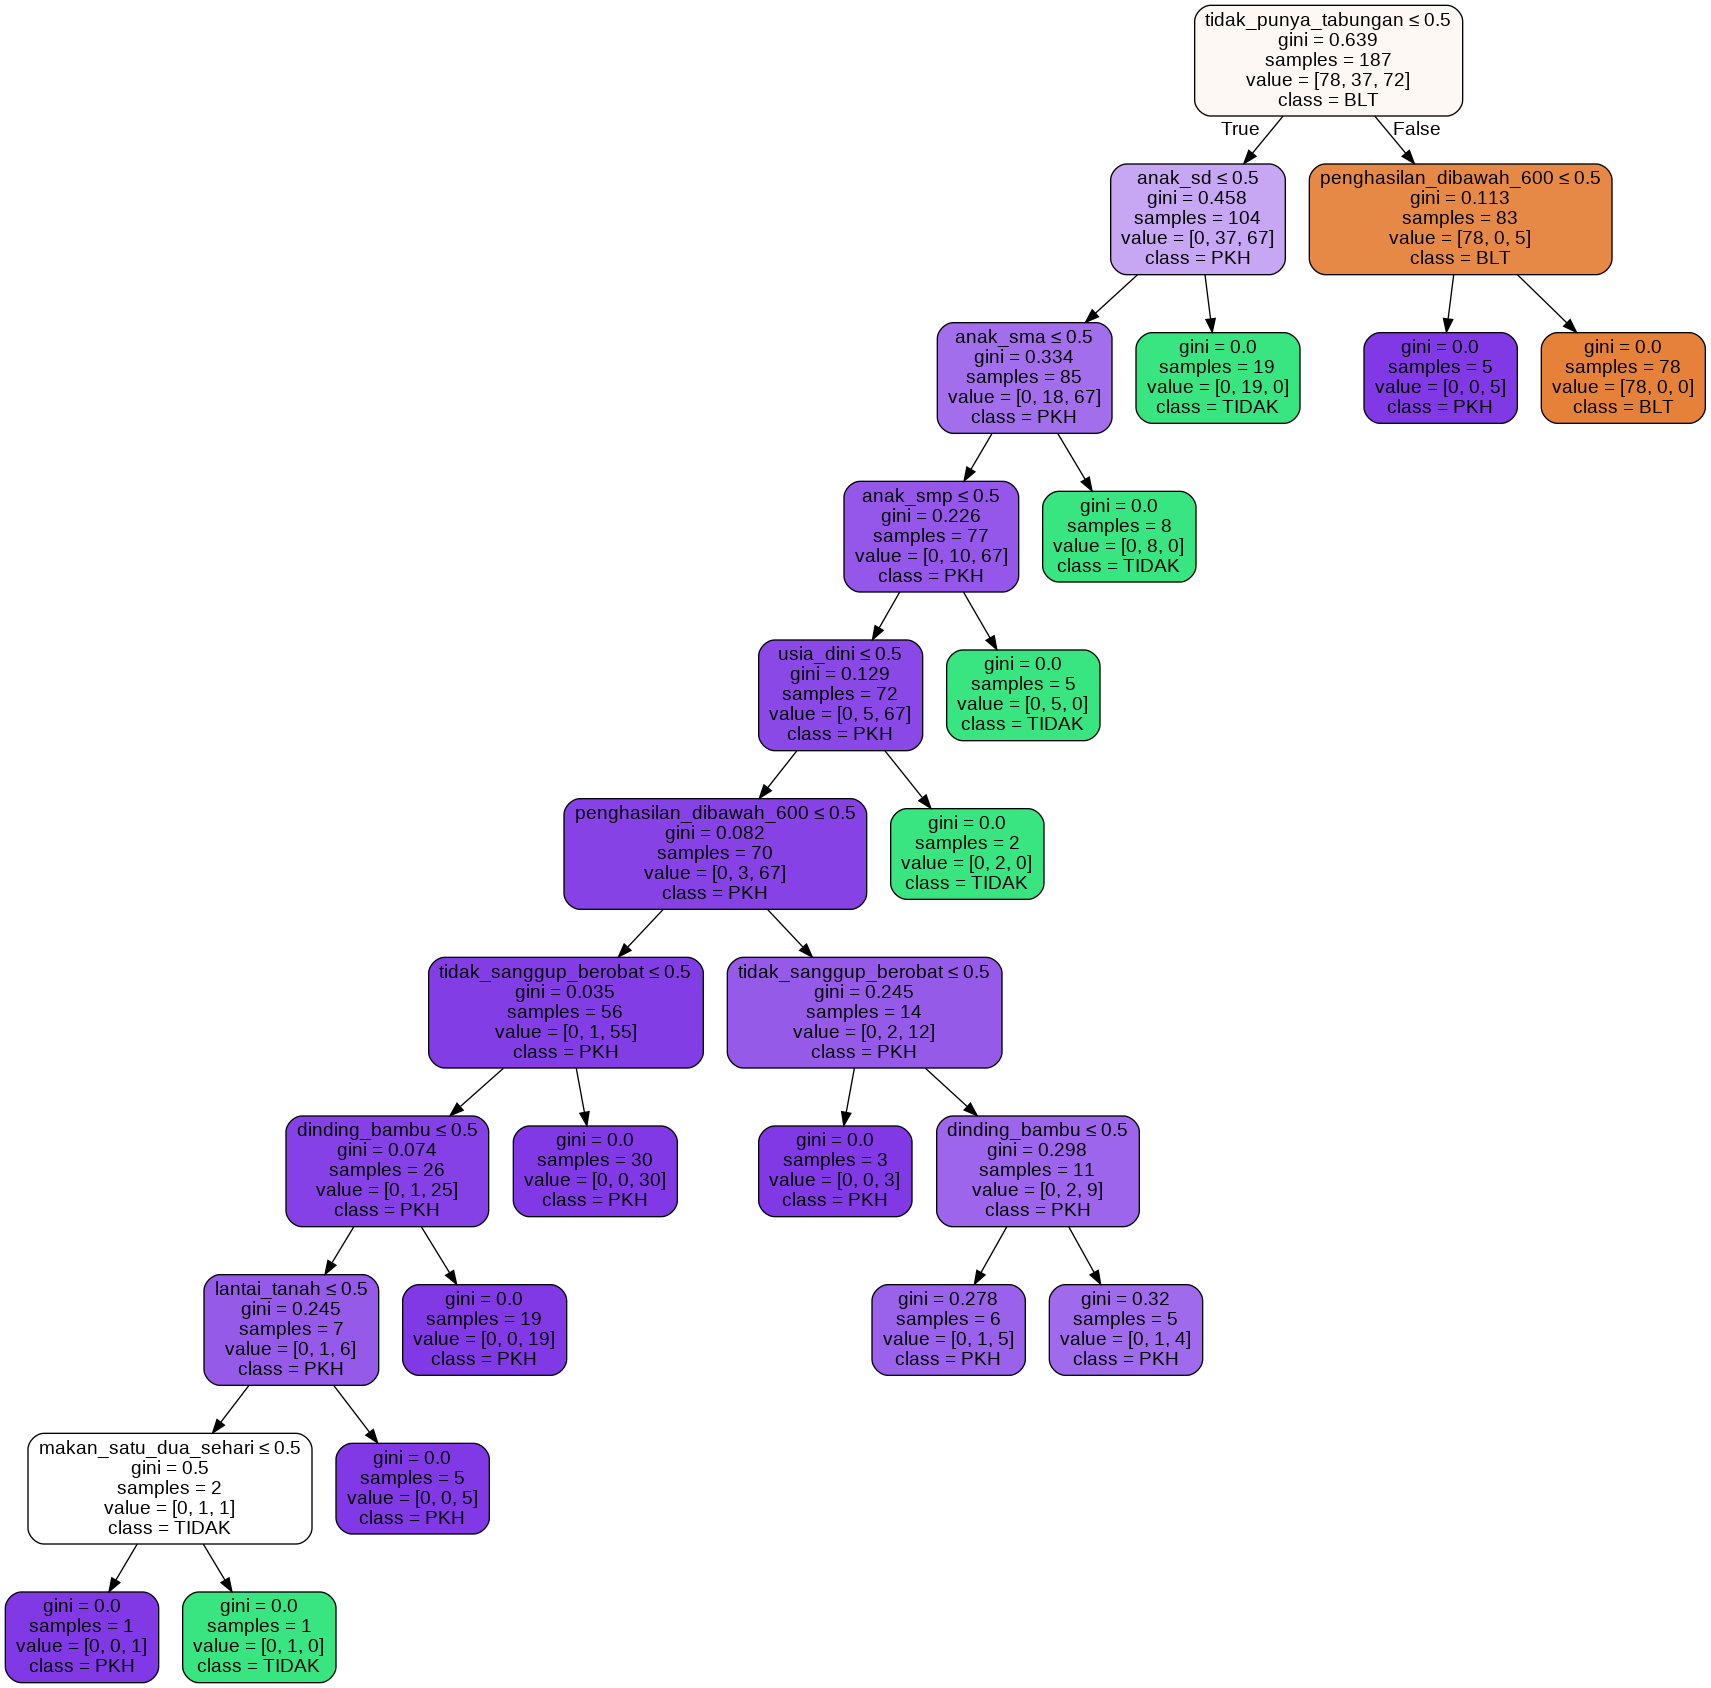

In [ ]:
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
tree_image = cv2.imread('tree.png')
cv2_imshow(tree_image)

In [ ]:
from sklearn.tree import export_text
print(export_text(model, feature_names=col[2:23]))

|--- tidak_punya_tabungan <= 0.50
|   |--- anak_sd <= 0.50
|   |   |--- anak_sma <= 0.50
|   |   |   |--- anak_smp <= 0.50
|   |   |   |   |--- usia_dini <= 0.50
|   |   |   |   |   |--- penghasilan_dibawah_600 <= 0.50
|   |   |   |   |   |   |--- tidak_sanggup_berobat <= 0.50
|   |   |   |   |   |   |   |--- dinding_bambu <= 0.50
|   |   |   |   |   |   |   |   |--- lantai_tanah <= 0.50
|   |   |   |   |   |   |   |   |   |--- makan_satu_dua_sehari <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: TIDAK
|   |   |   |   |   |   |   |   |   |--- makan_satu_dua_sehari >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: PKH
|   |   |   |   |   |   |   |   |--- lantai_tanah >  0.50
|   |   |   |   |   |   |   |   |   |--- class: TIDAK
|   |   |   |   |   |   |   |--- dinding_bambu >  0.50
|   |   |   |   |   |   |   |   |--- class: TIDAK
|   |   |   |   |   |   |--- tidak_sanggup_berobat >  0.50
|   |   |   |   |   |   |   |--- class: TIDAK
|   |   |   |   |   |--- pengha

In [ ]:
ccp_alphas, impurities = model.cost_complexity_pruning_path(X,y)

In [ ]:
col

['no',
 'nama',
 'luas_lantai',
 'lantai_tanah',
 'dinding_bambu',
 'tidak_punya_mck',
 'tidak_punya_listrik',
 'air_minum_sumur',
 'kayu_bakar',
 'daging_satu_seminggu',
 'satu_baju_setahun',
 'makan_satu_dua_sehari',
 'tidak_sanggup_berobat',
 'penghasilan_dibawah_600',
 'kk_tidak_sekolah',
 'tidak_punya_tabungan',
 'lansia',
 'disabilitas',
 'usia_dini',
 'ibu_hamil',
 'anak_sd',
 'anak_smp',
 'anak_sma',
 'not_set',
 'label']

In [ ]:
luas_lantai = 1
lantai_tanah = 1
dinding_bambu = 1
tidak_punya_mck = 1
tidak_punya_listrik = 1
air_minum_sumur =1
kayu_bakar =1
daging_satu_seminggu =1
satu_baju_setahun =1
makan_satu_dua_sehari =1
tidak_sanggup_berobat =1
penghasilan_dibawah_600 =1
kk_tidak_sekolah =1
tidak_punya_tabungan =1
lansia =0
disabilitas =1
usia_dini =1
ibu_hamil =1
anak_sd =1
anak_smp =1
anak_sma =1

In [ ]:
data = [
        luas_lantai,
        lantai_tanah,
        dinding_bambu,
        tidak_punya_mck,
        tidak_punya_listrik,
        air_minum_sumur,
        kayu_bakar,
        daging_satu_seminggu,
        satu_baju_setahun,
        makan_satu_dua_sehari,
        tidak_sanggup_berobat,
        penghasilan_dibawah_600,
        kk_tidak_sekolah,
        tidak_punya_tabungan,
        lansia,
        disabilitas,
        usia_dini,
        ibu_hamil,
        anak_sd,
        anak_smp,
        anak_sma,
        ]

In [ ]:
model.predict([data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['BLT'], dtype=object)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.973404255319149


In [ ]:
clf = svm.SVC(kernel='linear')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9893617021276596
